# Credit Card Fraud Detection

**Objective**: Detect credit card fraud by using clustering and anomalies detection.

*Dataset*: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

## Inicialization

### Imports

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_extraction import FeatureHasher

### Visual config

In [8]:
%matplotlib inline
plt.style.use('Solarize_Light2')
sns.set(style='darkgrid', palette='colorblind')

## Data Visualization

In [10]:
df = pd.read_csv('bank_transactions_data_2.csv')

In [11]:
df.shape

(2512, 16)

In [12]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [13]:
df.drop('TransactionID', axis=1, inplace=True)

In [14]:
df['LoginAttempts'].value_counts()

LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                2512 non-null   object 
 1   TransactionAmount        2512 non-null   float64
 2   TransactionDate          2512 non-null   object 
 3   TransactionType          2512 non-null   object 
 4   Location                 2512 non-null   object 
 5   DeviceID                 2512 non-null   object 
 6   IP Address               2512 non-null   object 
 7   MerchantID               2512 non-null   object 
 8   Channel                  2512 non-null   object 
 9   CustomerAge              2512 non-null   int64  
 10  CustomerOccupation       2512 non-null   object 
 11  TransactionDuration      2512 non-null   int64  
 12  LoginAttempts            2512 non-null   int64  
 13  AccountBalance           2512 non-null   float64
 14  PreviousTransactionDate 

In [16]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [17]:
df.isnull().sum()

AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

### Feature Analysis

#### Histplots

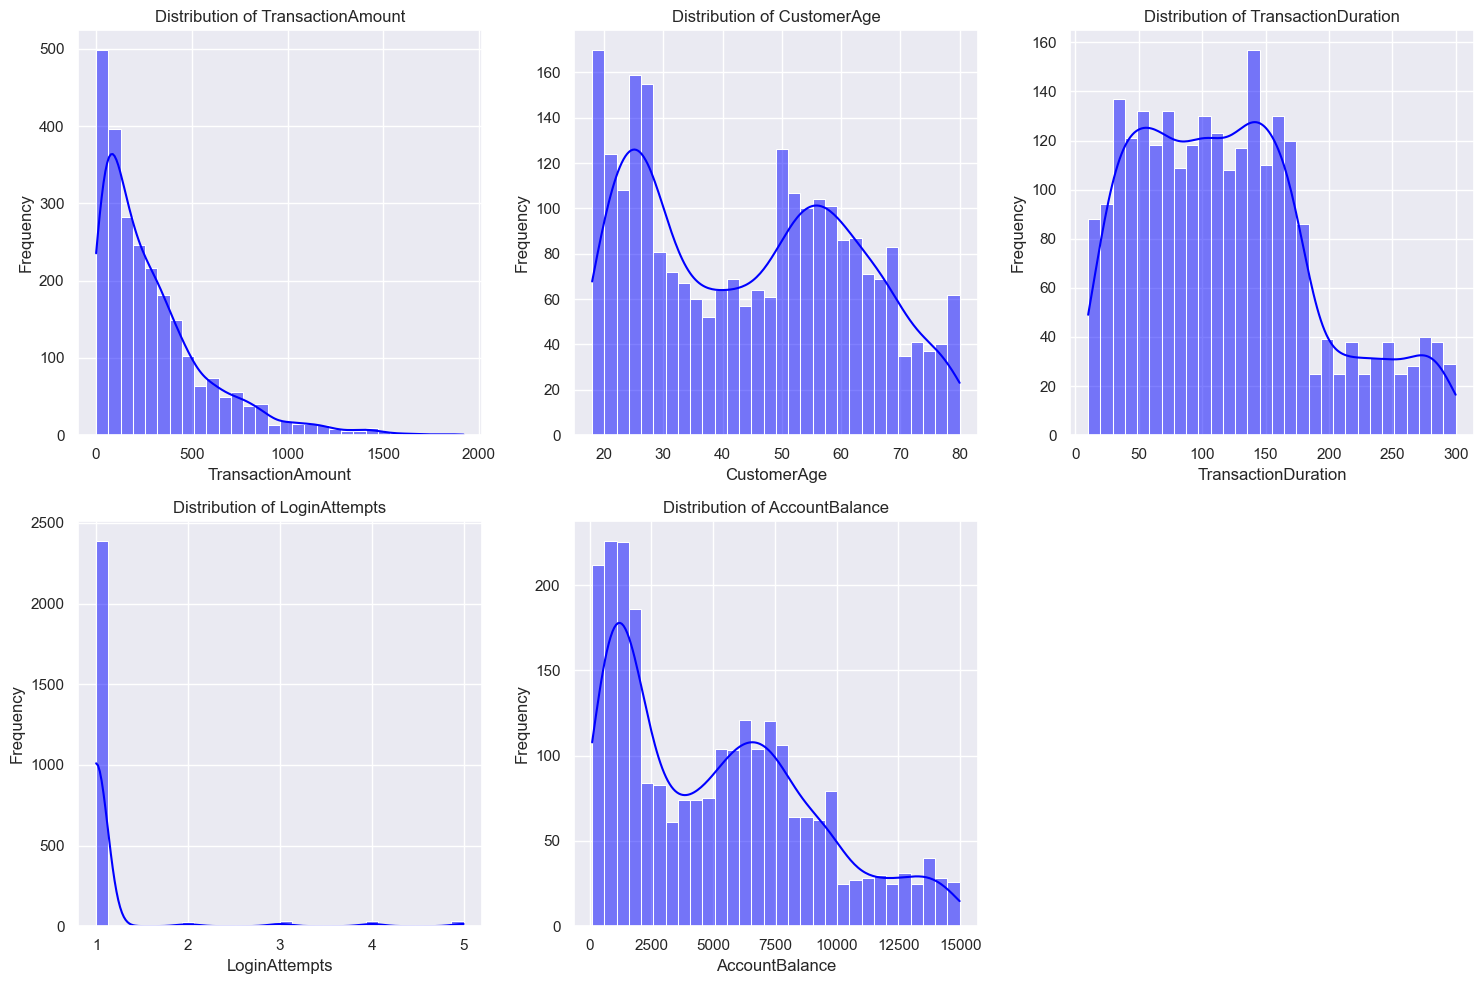

In [20]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Boxplots

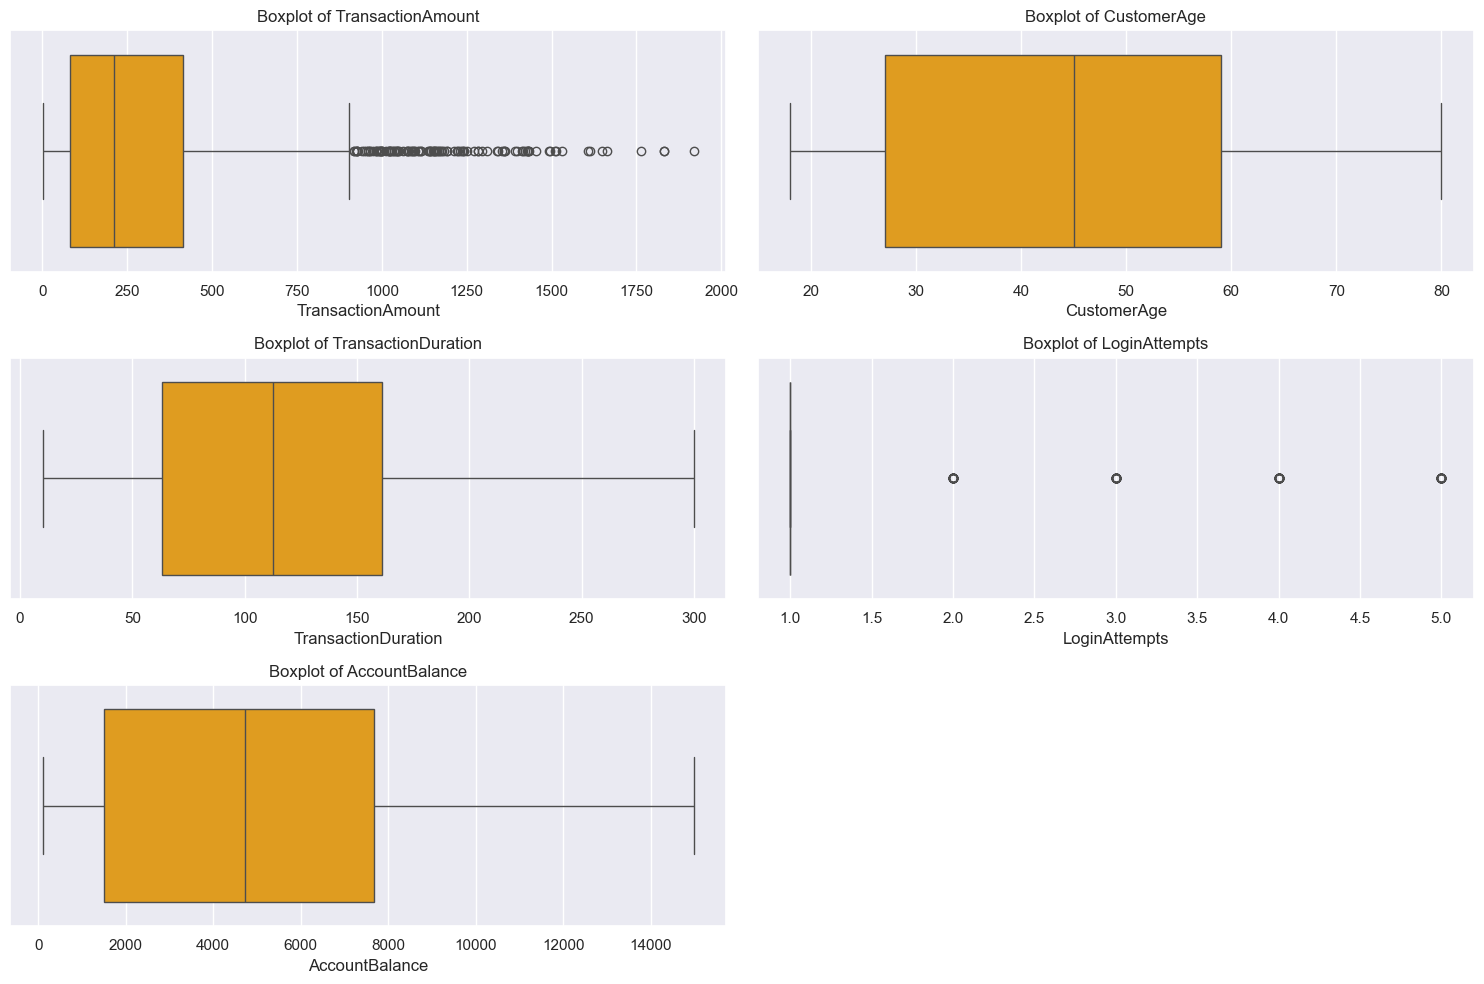

In [22]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[var], color='orange')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()

### Exploring Login Attempts

Values different from 1 are outliers. Let's explore them in detail.

#### Separating LoginAttempts outliers

In [26]:
single_attempts = df[df['LoginAttempts'] == 1]
multiple_attempts = df[df['LoginAttempts'] > 1]

print(f"Single Attempt Transactions: {len(single_attempts)}")
print(f"Multiple Attempt Transactions: {len(multiple_attempts)}")

Single Attempt Transactions: 2390
Multiple Attempt Transactions: 122


#### Comparing descriptive stats

In [28]:
print("Stats - Single Attempt Transactions:")
single_attempts.describe()

Stats - Single Attempt Transactions:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2390.000000,2390.000000,2390.000000,2390.0,2390.000000
mean,298.027054,44.648536,119.128033,1.0,5094.212556
std,292.775303,17.753802,69.812674,0.0,3879.741981
min,0.260000,18.000000,10.000000,1.0,101.250000
25%,81.180000,27.000000,63.000000,1.0,1504.727500
50%,211.270000,45.000000,111.000000,1.0,4732.690000
75%,416.247500,59.000000,161.000000,1.0,7626.912500
max,1919.110000,80.000000,300.000000,1.0,14977.990000


In [29]:
print("Stats - Multiple Attempt Transactions:")
multiple_attempts.describe()

Stats - Multiple Attempt Transactions:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,289.105820,45.172131,129.737705,3.565574,5507.877377
std,276.205495,18.597384,72.417842,1.105865,4293.692101
min,1.930000,18.000000,11.000000,2.000000,271.780000
25%,95.695000,27.250000,75.500000,3.000000,1467.937500
50%,203.625000,47.000000,127.500000,4.000000,4974.550000
75%,372.802500,59.750000,166.750000,5.000000,8412.622500
max,1531.310000,80.000000,291.000000,5.000000,14851.280000


#### Binary Codification

In [31]:
df['LoginAttempts_Binary'] = df['LoginAttempts'].apply(lambda x: 'Single' if x == 1 else 'Multiple')

df['LoginAttempts_Binary'].value_counts()

LoginAttempts_Binary
Single      2390
Multiple     122
Name: count, dtype: int64

#### Visualising Boxplots

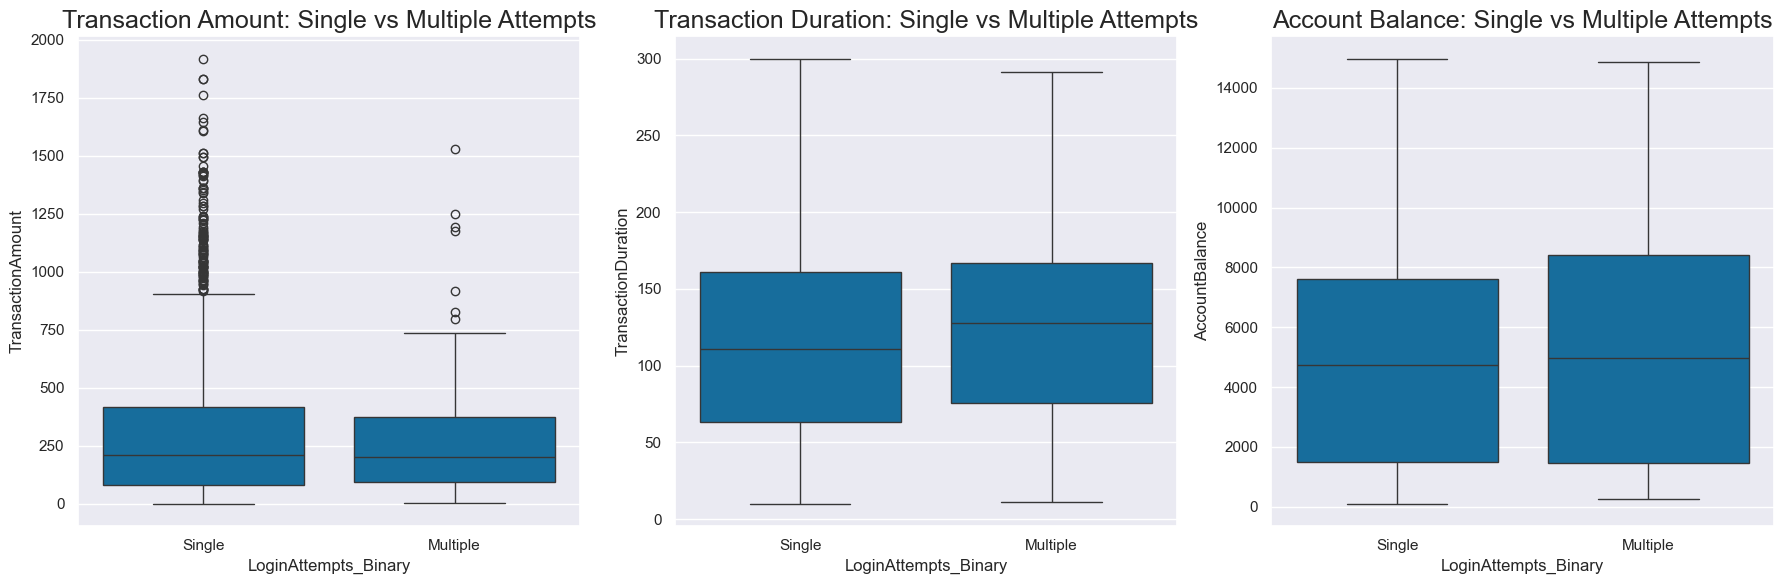

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# TransactionAmount
sns.boxplot(x='LoginAttempts_Binary', y='TransactionAmount', 
            data=df, ax=axes[0])
axes[0].set_title("Transaction Amount: Single vs Multiple Attempts", fontsize=18)

# TransactionDuration
sns.boxplot(x='LoginAttempts_Binary', y='TransactionDuration', 
            data=df, ax=axes[1])
axes[1].set_title("Transaction Duration: Single vs Multiple Attempts", fontsize=18)

# AccountBalance
sns.boxplot(x='LoginAttempts_Binary', y='AccountBalance', 
            data=df, ax=axes[2])
axes[2].set_title("Account Balance: Single vs Multiple Attempts", fontsize=18)

plt.tight_layout()
plt.show()

##### Correlation Matrix

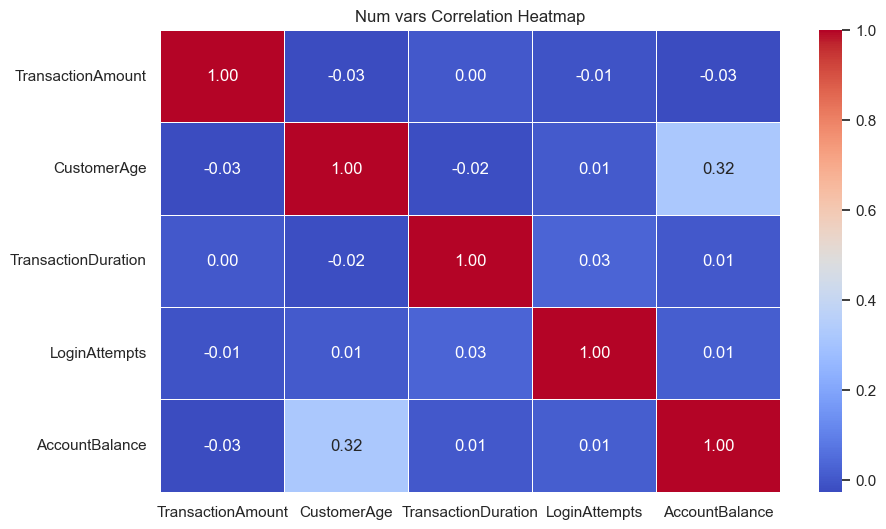

In [35]:
correlation_matrix = df[["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Num vars Correlation Heatmap")
plt.show()


There isn't much correlation between variables and there isn't a significant difference between Single and Multiple Attempts regarding to the range of the boxplots.

In [79]:
df.drop('LoginAttempts_Binary', axis=1, inplace=True)

## Feature Engineering

### Categories Treatment

#### Frecuency

In [81]:
cat_vars = df.select_dtypes(include='object')

for var in cat_vars:
    print(f"Frecuencia de categorías en '{var}':")
    print(df[var].value_counts(normalize=True).head(10))
    print("-" * 50)

Frecuencia de categorías en 'AccountID':
AccountID
AC00362    0.004777
AC00363    0.004777
AC00202    0.004777
AC00460    0.004777
AC00257    0.004379
AC00456    0.004379
AC00304    0.004379
AC00480    0.004379
AC00225    0.004379
AC00267    0.003981
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencia de categorías en 'TransactionDate':
TransactionDate
2023-04-11 16:29:14    0.000398
2023-12-15 16:38:43    0.000398
2023-03-20 16:02:51    0.000398
2023-11-15 17:32:11    0.000398
2023-09-11 17:52:59    0.000398
2023-07-27 17:51:27    0.000398
2023-10-13 16:05:10    0.000398
2023-07-10 16:41:50    0.000398
2023-10-27 17:53:06    0.000398
2023-07-03 16:38:45    0.000398
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencia de categorías en 'TransactionType':
TransactionType
Debit     0.773885
Credit    0.226115
Name: proportion, dtype: float64
--------------------------------------------------
Frecuencia de

#### Codifications

**Label Encoding**:
* TransactionType 

**One-Hot Encoding**:
* Channel
* CustomerOccupation

**Hashing Encoding**:
* AccountID
* DeviceID
* IP Address
* MerchantID

**Time Transformation**:
* TransactionDate
* PreviousTransactionDate

**Location**:
* Target Encoding.

In [141]:
df_encoded = df.copy()

#### 1. Hashing Encoder

In [150]:
hash_columns = ['AccountID', 'DeviceID', 'IP Address', 'MerchantID']
n_components = 8  # Número de características del hashing

for col in hash_columns:
    hasher = FeatureHasher(n_features=n_components, input_type='string')
    hashed_features = hasher.transform(df_encoded[[col]].astype(str).apply(lambda x: [x[0]], axis=1)).toarray()
    hashed_df = pd.DataFrame(hashed_features, columns=[f"Hash_{col}_{i}" for i in range(n_components)])
    df_encoded = pd.concat([df_encoded.drop(columns=[col]), hashed_df], axis=1)

C:\Users\David\AppData\Local\Temp\ipykernel_1860\1378135224.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hashed_features = hasher.transform(df_encoded[[col]].astype(str).apply(lambda x: [x[0]], axis=1)).toarray()
C:\Users\David\AppData\Local\Temp\ipykernel_1860\1378135224.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hashed_features = hasher.transform(df_encoded[[col]].astype(str).apply(lambda x: [x[0]], axis=1)).toarray()
C:\Users\David\AppData\Local\Temp\ipykernel_1860\1378135224.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

In [ ]:
### 2. One-Hot Encoding para variables categóricas bajas en cardinalidad ###
ohe_columns = ['TransactionType', 'Channel', 'CustomerOccupation']
ohe = OneHotEncoder(drop=None, sparse=False)  # No eliminamos categorías
encoded_ohe = ohe.fit_transform(df_encoded[ohe_columns])

# Crear DataFrame de OHE
ohe_df = pd.DataFrame(encoded_ohe, columns=ohe.get_feature_names_out(ohe_columns))
df_encoded = pd.concat([df_encoded.drop(columns=ohe_columns), ohe_df], axis=1)

### 3. Escalado de variables numéricas ###
numerical_columns = ['TransactionAmount', 'TransactionDuration', 
                     'CustomerAge', 'AccountBalance', 'DaysSinceLastTransaction']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[numerical_columns])

# Crear DataFrame escalado
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
df_encoded[numerical_columns] = scaled_df

### 4. Resultados finales ###
print("Columnas después de las transformaciones:\n", df_encoded.columns)
print("\nEjemplo del DataFrame transformado:")
print(df_encoded.head())
